In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import random
import numpy as np
import os

In [2]:
np.load(f"generated/Shuttle_xhat_task_26.npy").shape

(2000, 2)

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_shuttle = fetch_ucirepo(id=148) 
  
# data (as pandas dataframes) 
X = statlog_shuttle.data.features 
y = statlog_shuttle.data.targets 
  
# metadata 
print(statlog_shuttle.metadata) 
  
# variable information 
print(statlog_shuttle.variables) 


{'uci_id': 148, 'name': 'Statlog (Shuttle)', 'repository_url': 'https://archive.ics.uci.edu/dataset/148/statlog+shuttle', 'data_url': 'https://archive.ics.uci.edu/static/public/148/data.csv', 'abstract': 'The shuttle dataset contains 9 attributes all of which are numerical. Approximately 80% of the data belongs to class 1', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 58000, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C5WS31', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Approximately 80% of the data belongs to class 1. Therefore the default accuracy is about 80%. The aim here is to obtain an accuracy of 99 - 99.9%.\r\n\r\nThe examples in the original dataset were in time or

In [4]:
X['label'] = y
X = X.reset_index(level=1, drop=True)
X

Rad Flow  Fpv Close  Fpv Open  High  Bypass  Bpv Close  Bpv Open  label
50        77          0        28     0      27         48        22      2
55        92          0         0    26      36         92        56      4
53        82          0        52    -5      29         30         2      1
37        76          0        28    18      40         48         8      1
37        79          0        34   -26      43         46         2      1
..       ...        ...       ...   ...     ...        ...       ...    ...
80        84          0       -36   -29       4        120       116      5
55        81          0       -20    25      26        102        76      4
55        77          0        12   -22      22         65        42      4
37       103          0        18   -16      66         85        20      1
56        98          0        52     1      42         46         4      4

[58000 rows x 8 columns]

In [5]:
X = X.sort_index()

In [6]:
idx = X['label'] != 1
idx

27     False
27     False
27     False
36     False
36     False
       ...  
123     True
123     True
123     True
123     True
126     True
Name: label, Length: 58000, dtype: bool

In [7]:
X.loc[idx, 'label'] = 0

In [8]:
idx = X['label'] == 0
idx.sum()

np.int64(12414)

In [9]:
train_domain_idx = (X.index >= 30) & (X.index <= 70)

for i in range(1, 8):
    tmp = (X.index >= (i * 10)) & (X.index <= ((i+1) * 10))
    print("# of domain sample: ", tmp.sum())

print("# of train domain sample: ", train_domain_idx.sum())

# of domain sample:  0
# of domain sample:  3
# of domain sample:  16199
# of domain sample:  21491
# of domain sample:  18059
# of domain sample:  434
# of domain sample:  977
# of train domain sample:  54676


In [10]:
train_domain = X.loc[train_domain_idx]

In [11]:
index_list = []
for i in range(1, 16):
    tmp = (train_domain.index >= (i * 5)) & (train_domain.index <= ((i+1) * 5))
    index_list.append(tmp)
    print("# of domain sample: ", tmp.sum())

# of domain sample:  0
# of domain sample:  0
# of domain sample:  0
# of domain sample:  0
# of domain sample:  0
# of domain sample:  0
# of domain sample:  16199
# of domain sample:  13585
# of domain sample:  11157
# of domain sample:  11497
# of domain sample:  12511
# of domain sample:  298
# of domain sample:  154
# of domain sample:  6
# of domain sample:  0


In [12]:
train_domain_arr = X.loc[train_domain_idx].to_numpy()

In [13]:
train_domain_arr.shape

(54676, 8)

In [14]:
# UMAP은 scikit-learn에 포함되어 있지 않고, 별도의 umap-learn 패키지에서 제공합니다.
# 설치가 필요하다면 아래 명령어를 터미널이나 노트북 셀에 입력하세요:
# !pip install umap-learn

from umap import UMAP

umap = UMAP(n_components=2,random_state=42)
X_train_umap = umap.fit_transform(train_domain_arr[:, :-1])
X_train_umap.shape

/home/sjlee/miniconda3/envs/TPC/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sjlee/miniconda3/envs/TPC/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/sjlee/miniconda3/envs/TPC/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(54676, 2)

In [16]:
train_domain.loc[:,'umap_x'] = X_train_umap[:, 0]
train_domain.loc[:,'umap_y'] = X_train_umap[:, 1]
train_domain

Rad Flow  Fpv Close  Fpv Open  High  Bypass  Bpv Close  Bpv Open  label  \
36        83          0        36     0      47         47         0      1   
36        81          0        36     0      45         45         0      1   
36        83          3        36     0      46         46         0      1   
36        83          8        36     0      46         46         0      1   
36        80          0        36     0      44         44         0      1   
..       ...        ...       ...   ...     ...        ...       ...    ...   
70        82          0       -42    -4      12        126       114      0   
70        74         -4       -42   -12       4        118       114      0   
70        88          0         8     0      18         81        62      0   
70       107          0        60   -13      37         47        10      0   
70        82          0       -40    28      12        123       112      0   

      umap_x     umap_y  
36  3.154697 -10.734791  
36  5.414331 -10.017453  
36  3.287432 -10.512910  
36  3.428862 -10.336650  
36  5.274712  -9.853047  
..       ...        ...  
70  3.837939   8.693704  
70  3.839808   8.694703  
70  3.632400  12.315169  
70  5.421801  -0.296434  
70  3.599598   9.052423  

[54676 rows x 10 columns]

In [17]:
print("# of label = 0: ", (train_domain['label']==0).sum())
print("# of label = 1: ", (train_domain['label']==1).sum())

# of label = 0:  9093
# of label = 1:  45583


In [18]:
from sklearn.preprocessing import StandardScaler

for i in range(len(train_domain.columns)):
    if train_domain.columns[i] in ['label']:
        continue
    scaler = StandardScaler()
    train_domain.iloc[:, i] = scaler.fit_transform(train_domain.iloc[:, i].values.reshape(-1, 1))
train_domain.head()

/tmp/ipykernel_2151141/1027806184.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.23215506 -0.46042121 -0.23215506 ...  0.33851032  2.50703878
 -0.34628814]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_domain.iloc[:, i] = scaler.fit_transform(train_domain.iloc[:, i].values.reshape(-1, 1))
/tmp/ipykernel_2151141/1027806184.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.0089564  -0.0089564   0.07331387 ... -0.0089564  -0.0089564
 -0.0089564 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_domain.iloc[:, i] = scaler.fit_transform(train_domain.iloc[:, i].values.reshape(-1, 1))
/tmp/ipykernel_2151141/1027806184.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[

Rad Flow  Fpv Close  Fpv Open     High    Bypass  Bpv Close  Bpv Open  \
36 -0.232155  -0.008956  -0.01834 -0.00918  0.756852  -0.097360 -0.552792   
36 -0.460421  -0.008956  -0.01834 -0.00918  0.563974  -0.208532 -0.552792   
36 -0.232155   0.073314  -0.01834 -0.00918  0.660413  -0.152946 -0.552792   
36 -0.232155   0.210431  -0.01834 -0.00918  0.660413  -0.152946 -0.552792   
36 -0.574554  -0.008956  -0.01834 -0.00918  0.467535  -0.264119 -0.552792   

    label    umap_x    umap_y  
36      1 -0.673582 -1.571697  
36      1 -0.393808 -1.487879  
36      1 -0.657148 -1.545771  
36      1 -0.639637 -1.525175  
36      1 -0.411095 -1.468668

Text(0.5, 1.0, 'UMAP Projection')

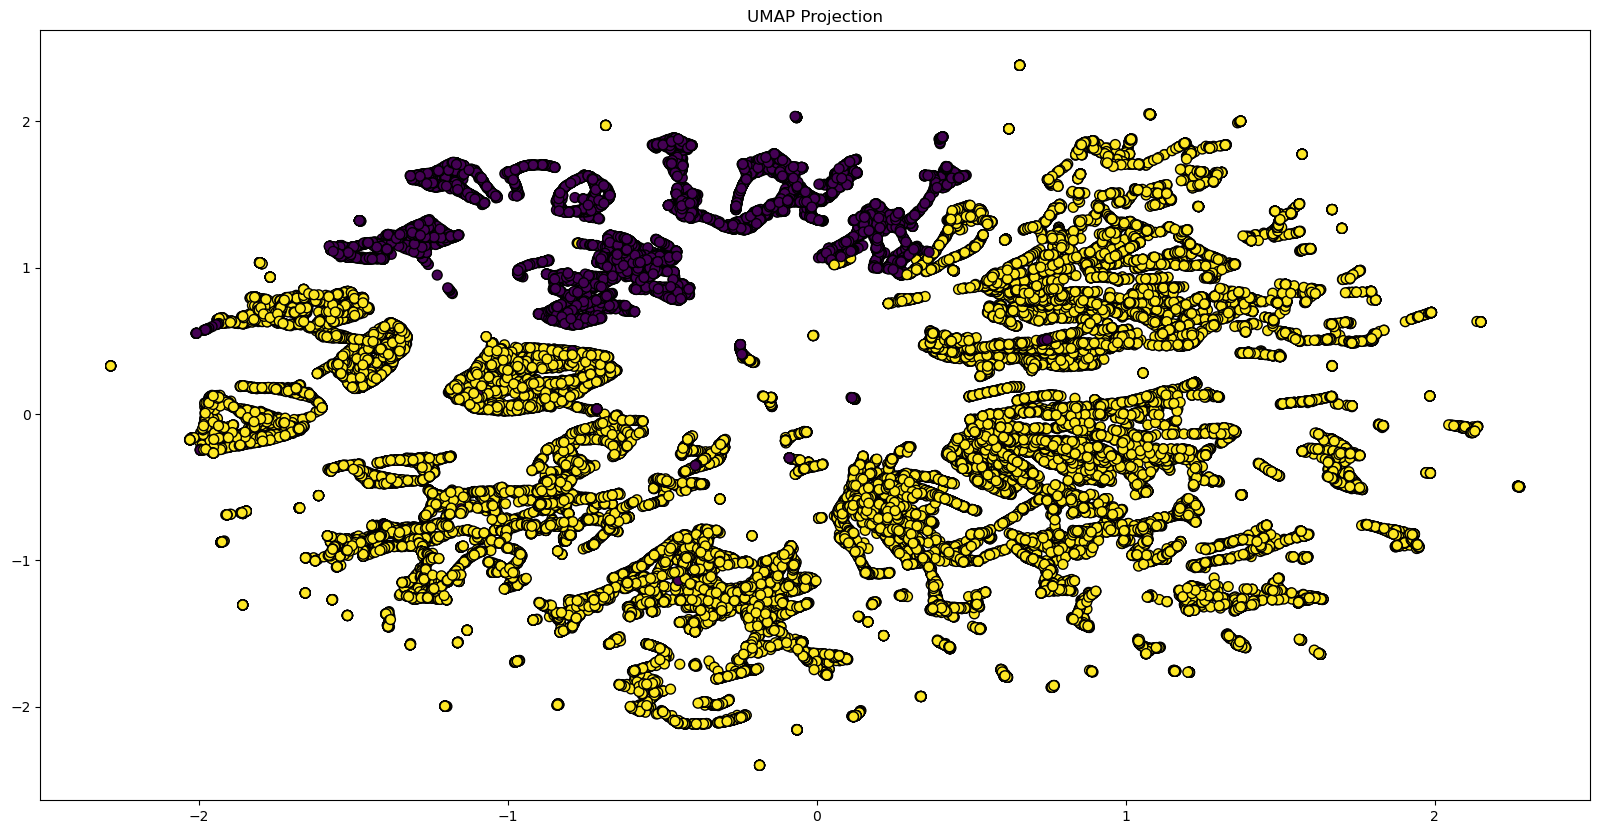

In [19]:
plt.figure(figsize=(20, 10))
plt.scatter(train_domain.iloc[:, -2].values, train_domain.iloc[:, -1].values,
            c=train_domain.iloc[:, -3].values, edgecolor='k', s=50)
plt.title(f"UMAP Projection")

In [54]:
train_domain_0 = train_domain[train_domain['label'] == 0]
train_domain_1 = train_domain[train_domain['label'] == 1]
print(len(train_domain_0), len(train_domain_1))

9093 45583


In [55]:
train_domain_0 = train_domain_0.loc[train_domain_0.loc[:,'umap_y']>0,:]
train_domain_1 = train_domain_1.loc[train_domain_1.loc[:,'umap_y']<0,:]
print(len(train_domain_0), len(train_domain_1))

9022 28337


In [56]:
train_domain_1 = train_domain_1.sort_values(by='umap_x')
train_domain_1 = train_domain_1.reset_index(drop=True)
train_domain_1

Rad Flow  Fpv Close  Fpv Open     High    Bypass  Bpv Close  Bpv Open  \
0     -0.916954  -0.036380 -0.914939 -0.00918  0.081778   0.402918  0.353808   
1     -0.916954  -0.008956 -0.914939 -0.00918  0.081778   0.402918  0.353808   
2     -0.916954  -0.008956 -0.914939 -0.00918  0.081778   0.402918  0.353808   
3     -0.916954  -0.008956 -0.914939 -0.00918  0.081778   0.402918  0.353808   
4     -0.916954  -0.036380 -0.914939 -0.00918  0.081778   0.402918  0.353808   
...         ...        ...       ...      ...       ...        ...       ...   
28332 -1.031087  -0.008956  0.317885 -0.00918 -0.593296  -0.819983 -0.439467   
28333 -1.031087  -0.008956  0.317885 -0.00918 -0.593296  -0.819983 -0.439467   
28334 -1.031087  -0.008956  0.317885 -0.00918 -0.593296  -0.819983 -0.439467   
28335 -1.031087  -0.008956  0.317885 -0.00918 -0.593296  -0.819983 -0.439467   
28336 -1.031087  -0.008956  0.317885 -0.00918 -0.593296  -0.819983 -0.439467   

       label    umap_x    umap_y  
0          1 -2.029757 -0.176069  
1          1 -2.029512 -0.175674  
2          1 -2.029175 -0.176028  
3          1 -2.028490 -0.175987  
4          1 -2.028362 -0.175568  
...      ...       ...       ...  
28332      1  2.275075 -0.497662  
28333      1  2.275100 -0.497686  
28334      1  2.275106 -0.497683  
28335      1  2.275108 -0.497682  
28336      1  2.275735 -0.498221  

[28337 rows x 10 columns]

In [57]:
train_domain_list = []

scale = 1000
for i in range(28): # 30개의 도메인
    tmp = train_domain_1.iloc[i*scale:(i+1)*scale]
    sampled_0 = train_domain_0.sample(n=1000)

    concat_df = pd.concat([tmp, sampled_0], ignore_index=True)
    concat_df = concat_df.reset_index(drop=True)

    train_domain_list.append(concat_df)

In [58]:
cond = train_domain_list[0]['label'] == 0
(train_domain_list[0].loc[cond, 'umap_y'] > 0).sum()

np.int64(1000)

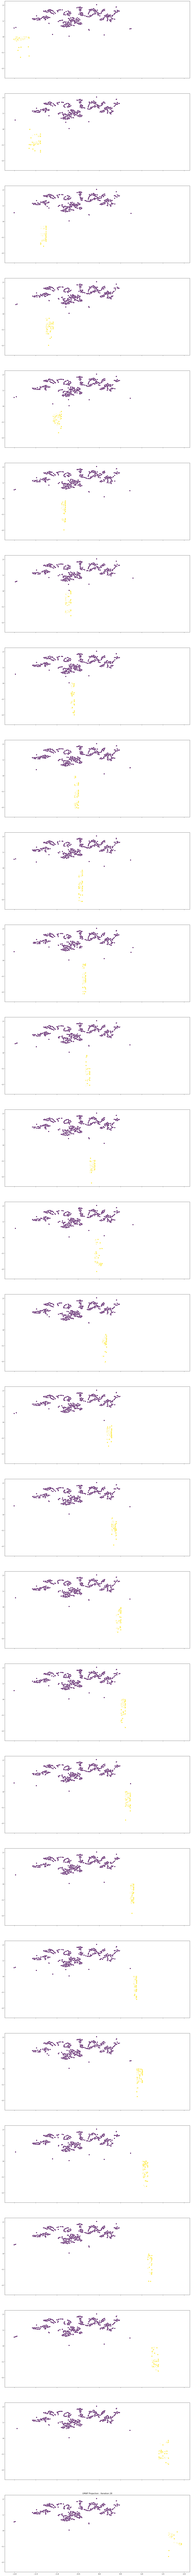

In [ ]:
fig, axes = plt.subplots(nrows=len(train_domain_list), ncols=1,figsize=(20,10*len(train_domain_list)),
                         sharex=True, sharey=True)
for i in range(len(train_domain_list)):
    plot_df = train_domain_list[i]
    axes[i].scatter(plot_df.iloc[:, -2], plot_df.iloc[:, -1], c=plot_df.loc[:, 'label'], edgecolor='w', s=50)
    plt.title(f"UMAP Projection - Iteration {i+1}")

In [64]:
final_domain_list = []
for i in range(len(train_domain_list)):
    tmp = train_domain_list[i]
    cols = ['umap_x', 'umap_y', 'label']
    tmp = tmp.loc[:, cols]
    final_domain_list.append(tmp)

final_domain_df = pd.concat(final_domain_list, ignore_index=True)    
final_domain_df = final_domain_df.reset_index(drop=True)
print(final_domain_df.shape)

(56000, 3)


In [65]:
final_domain_df.to_csv("./data/shuttle/domain_data_umap_feat.csv",index=False)

In [66]:
final_domain_df

umap_x    umap_y  label
0     -2.029757 -0.176069      1
1     -2.029512 -0.175674      1
2     -2.029175 -0.176028      1
3     -2.028490 -0.175987      1
4     -2.028362 -0.175568      1
...         ...       ...    ...
55995  0.302935  1.331758      0
55996 -1.305936  1.601369      0
55997 -0.694644  1.084747      0
55998 -0.779986  0.825846      0
55999 -0.016502  1.413736      0

[56000 rows x 3 columns]

In [67]:
final_domain_list = []
for i in range(len(train_domain_list)):
    tmp = train_domain_list[i]
    drop_cols = ['umap_x', 'umap_y']
    tmp = tmp.drop(columns=drop_cols)
    final_domain_list.append(tmp)

final_domain_df = pd.concat(final_domain_list, ignore_index=True)    
final_domain_df = final_domain_df.reset_index(drop=True)
print(final_domain_df.shape)

(56000, 8)


In [68]:
final_domain_df.to_csv("./data/shuttle/domain_data.csv",index=False)

In [69]:
final_domain_df

Rad Flow  Fpv Close  Fpv Open      High    Bypass  Bpv Close  Bpv Open  \
0     -0.916954  -0.036380 -0.914939 -0.009180  0.081778   0.402918  0.353808   
1     -0.916954  -0.008956 -0.914939 -0.009180  0.081778   0.402918  0.353808   
2     -0.916954  -0.008956 -0.914939 -0.009180  0.081778   0.402918  0.353808   
3     -0.916954  -0.008956 -0.914939 -0.009180  0.081778   0.402918  0.353808   
4     -0.916954  -0.036380 -0.914939 -0.009180  0.081778   0.402918  0.353808   
...         ...        ...       ...       ...       ...        ...       ...   
55995  1.251575   0.045890  0.878260 -0.070964  0.178217  -0.264119 -0.326142   
55996 -0.688687  -0.036380 -0.914939 -0.155213 -1.557688   0.514091  1.373732   
55997 -0.688687  -0.146074 -2.259838 -0.009180 -1.461249   2.014923  2.846956   
55998 -0.460421  -0.008956 -3.156438 -0.020414 -1.364809   2.959892  3.753555   
55999  0.795043  -0.008956  0.542035 -0.104663 -0.303978  -0.152946  0.013833   

       label  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
55995      0  
55996      0  
55997      0  
55998      0  
55999      0  

[56000 rows x 8 columns]